# 3. Convolutional Neural Network With MNIST Dataset

### 1. Import Necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

### 2. Loading Dataset (mnist: large database of handwritten digits)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]
#reshaping train and test
X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [3]:
#shape of train and test
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
#function to plot images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('on')
    plt.tight_layout()
    plt.show()

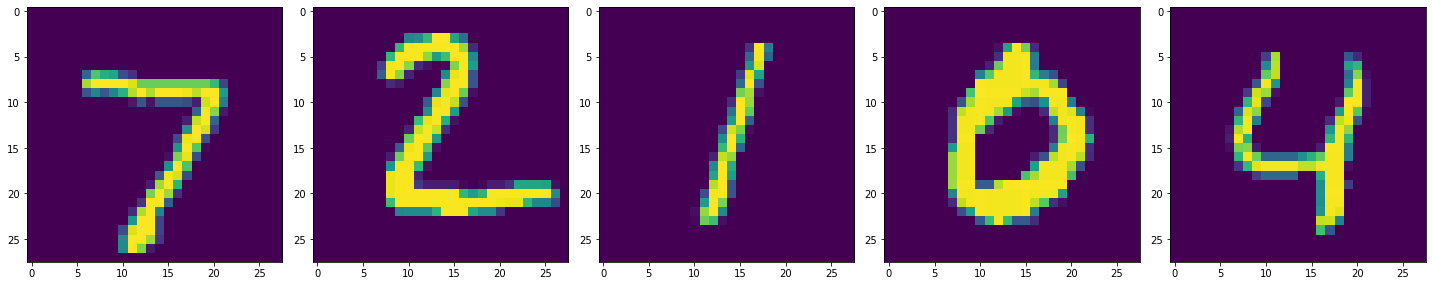

In [5]:
plotImages(x_test[:5])

### 3. Build Model: Convolutional Neural Network Architecture

In [6]:
model= keras.Sequential()
#convolution layer 1
model.add(keras.layers.Conv2D(40, (5,5), activation='relu', padding='same', input_shape=(28,28,1)))
#MaxPooling layer 2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
#convolution layer 3
model.add(keras.layers.Conv2D(40, (5,5), activation='relu', padding='same'))
#MaxPooling layer 4
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
#Flatten layer 5
model.add(keras.layers.Flatten()),
#Dense Layer 6
model.add(keras.layers.Dense(1024, activation='relu'))
#Dropout layer 7
model.add(keras.layers.Dropout(0.4))
#Dense Layer 8: Out is 10 because of 10 classes (digits)
model.add(keras.layers.Dense(10))

### 4. Model Summary:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 40)        1040      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 40)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 40)        40040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2008064   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

### 5. Compile the CNN

In [8]:
optimizer_adam = keras.optimizers.Adam(learning_rate=0.0001)
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer_adam,
              loss=loss,
              metrics=['sparse_categorical_accuracy'])

### 6. Model Training

In [9]:
#setting hyperparameters
batch_size = 100
epochs = 5
steps_per_epoch = 54000 // batch_size
validation_steps = 6000 // batch_size

In [10]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_split=0.1, 
                    validation_steps=validation_steps)

Epoch 1/5
540/540 [==============================] - 38s 70ms/step - loss: 3.0270 - sparse_categorical_accuracy: 0.7823 - val_loss: 0.0949 - val_sparse_categorical_accuracy: 0.9752
Epoch 2/5
540/540 [==============================] - 37s 68ms/step - loss: 0.1473 - sparse_categorical_accuracy: 0.9567 - val_loss: 0.0614 - val_sparse_categorical_accuracy: 0.9820
Epoch 3/5
540/540 [==============================] - 37s 69ms/step - loss: 0.0779 - sparse_categorical_accuracy: 0.9749 - val_loss: 0.0569 - val_sparse_categorical_accuracy: 0.9852
Epoch 4/5
540/540 [==============================] - 37s 69ms/step - loss: 0.0503 - sparse_categorical_accuracy: 0.9835 - val_loss: 0.0489 - val_sparse_categorical_accuracy: 0.9878
Epoch 5/5
540/540 [==============================] - 37s 68ms/step - loss: 0.0370 - sparse_categorical_accuracy: 0.9883 - val_loss: 0.0522 - val_sparse_categorical_accuracy: 0.9858


### 7. Visualizing Accuracy

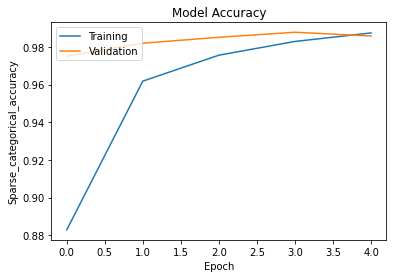

In [11]:
# Plot the accuracy of the model during training
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Sparse_categorical_accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

### 8. Visualizing Loss (Training and Validation)

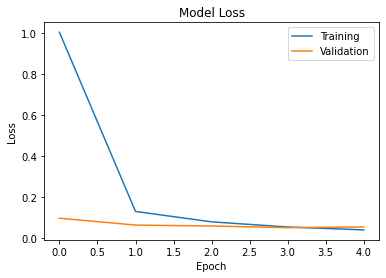

In [12]:
# Plot the loss of the model during training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### 9. Model Evaluation

In [13]:
# Evaluate the best model with testing data.
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 2s 6ms/step - loss: 0.0408 - sparse_categorical_accuracy: 0.9872
[0.04078300669789314, 0.9872000217437744]


### 10. Model Predictions

In [14]:
#prediting all test images
y_pred=np.argmax(model.predict(X_test), axis=-1)
print(y_pred)

[7 2 1 ... 4 5 6]


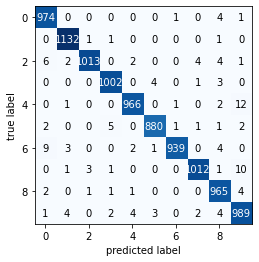

In [15]:
cf_matrix= confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(cf_matrix)
plt.show()

In [16]:
#predicting only 5 test images
predictions = np.argmax(model.predict(X_test[:5]), axis=-1)
print(predictions)
#these are the predicted results

[7 2 1 0 4]


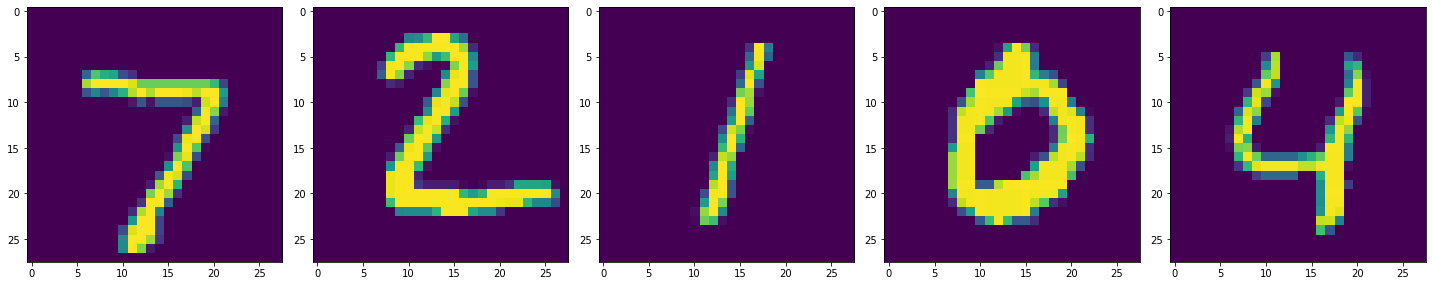

In [17]:
plotImages(x_test[:5])

## The END